In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from pandas.plotting._misc import scatter_matrix
from sklearn.model_selection import train_test_split
loan=pd.read_csv('train_ctrUa4K.csv', delimiter=',', quotechar='"')
loan.fillna(loan.mean(), inplace=True)

In [2]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [3]:
print('no of rows are ', len(loan))
print('no of clomuns are' ,(loan.columns))

no of rows are  614
no of clomuns are Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [4]:
loan.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
loan.keys()

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
loan.shape

(614, 13)

In [7]:
X=loan.drop(columns=['Loan_Status'])
Y=loan['Loan_Status']

In [8]:
X.shape

(614, 12)

In [9]:
Y.shape

(614,)

In [10]:
#plotting a scatter matrix
from matplotlib import cm
X=loan[[ 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']]
y=loan['Loan_Status']
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)


In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[ 2.31579042e-01, -5.47719682e-01, -7.30171133e-01,
         2.84862038e-01,  4.56804794e-01],
       [-2.00349795e-01, -5.47719682e-01, -4.08175520e-01,
         2.84862038e-01,  4.56804794e-01],
       [ 8.75523337e-02,  8.22309769e-01,  2.02979126e+00,
         2.84862038e-01,  4.56804794e-01],
       [-1.84767073e-01,  3.11968537e-01, -4.31175206e-01,
         2.84862038e-01,  4.56804794e-01],
       [-4.30610982e-01, -1.38394446e-01, -5.80673170e-01,
         2.84862038e-01,  4.56804794e-01],
       [-4.45588549e-01,  6.62017025e-01,  2.01316176e-01,
        -2.56582405e+00, -2.38292866e+00],
       [ 1.30518285e-01, -5.47719682e-01,  1.09317429e-01,
        -2.56582405e+00,  4.56804794e-01],
       [ 1.10769109e+00, -5.47719682e-01,  2.96127857e+00,
         2.84862038e-01,  4.56804794e-01],
       [-6.50978226e-02, -5.47719682e-01, -2.70177400e-01,
        -2.06571456e-04, -2.38292866e+00],
       [-5.25166331e-01,  5.57142778e-01, -2.24178027e-01,
         2.84862038e-01

In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

In [13]:

knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [14]:
knn.score(X_test,y_test)

0.6168831168831169

In [21]:
predict=knn.predict(X_test)
[predict[0] ]   
    

['Y']

In [15]:
loan_prediction = knn.predict([[50000, 10000, 5000,360,2]])
[loan_prediction[0]]


['Y']

In [17]:
loan_prediction = knn.predict([[10000, 5000, 2000,360,1]])
[loan_prediction[0]]

['N']

<IPython.core.display.Javascript object>


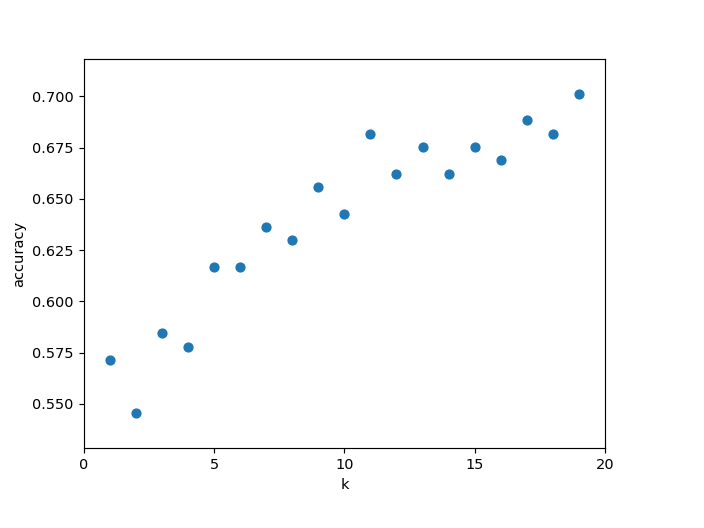

In [19]:
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);


<IPython.core.display.Javascript object>


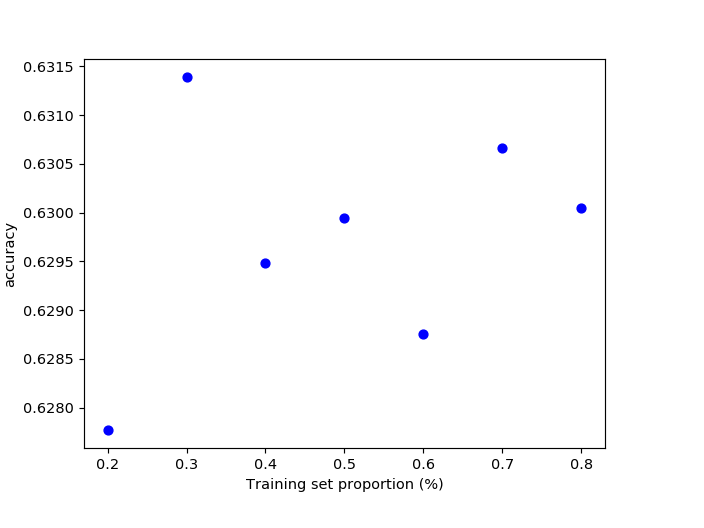

In [20]:
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsClassifier(n_neighbors = 5)

plt.figure()

for s in t:

    scores = []
    for i in range(1,1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');